<a href="https://colab.research.google.com/github/JSEFERINO/C_Datos/blob/main/23_C_Datos__Distribuciones_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio a la Ciencia de Datos por Julio Hurtado Márquez**
## **Parte IX- Encontrar la mejor distribución que se ajuste a sus datos usando la biblioteca Fitter de Python**
# **132. Distribuciones**

# **a. Nuestras librerias a usar**

In [ ]:
# **a. Nuestras librerias a usar**
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("Setup Complete")

Setup Complete


# **b. Importamos el archivo que será como ejemplo para nuestro trabajo**

In [ ]:
# **b. Nuestro archivo como ejemplo de trabajo**
import cv2 as cv
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


# **c. Tenemos nuestro DataFrame**
+ **Seleccione un conjunto de datos**. 
+ + Trabajaremos con un conjunto de datos de 150 flores diferentes, o 50 de cada una de tres especies diferentes de iris (Iris setosa, Iris versicolor e Iris virginica).

In [ ]:
# **c. Tenemos nuestro DataFrame**
data=pd.read_csv("Iris.csv",delimiter=',')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **d. Construyamos los Histogramas usando _distplot_ para cada Especie de Flor**
+ En su invocación más básica, distplot muestra tanto un histograma (utilizando la normalización de la densidad) como una estimación de la densidad del núcleo estimada

<ipython-input-12-783a60cef70d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[cols[0]], hist=True)
<ipython-input-12-783a60cef70d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[cols[1]], hist=True)
<ipython-input-12-783a60cef70d>:10: UserWarning: 

`distplot` is a deprecated 

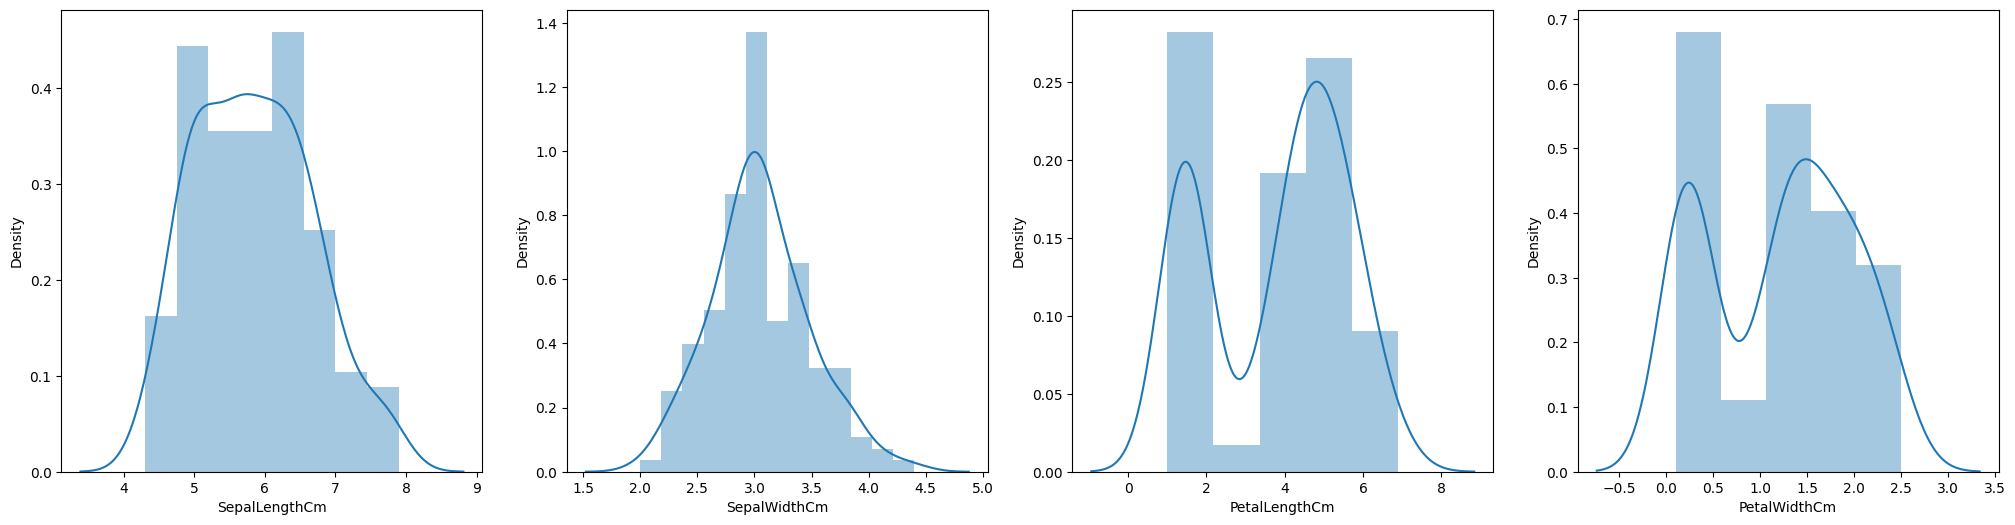

In [ ]:
# **d. Construyamos los Histogramas para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.distplot(a=data[cols[0]], hist=True)
plt.subplot(142)
sns.distplot(a=data[cols[1]], hist=True)
plt.subplot(143)
sns.distplot(a=data[cols[2]], hist=True)
plt.subplot(144)
sns.distplot(a=data[cols[3]], hist=True, norm_hist=True)
plt.show()

# **e. Construyamos los Histogramas usando _histplot_ para cada Especie de Flor**

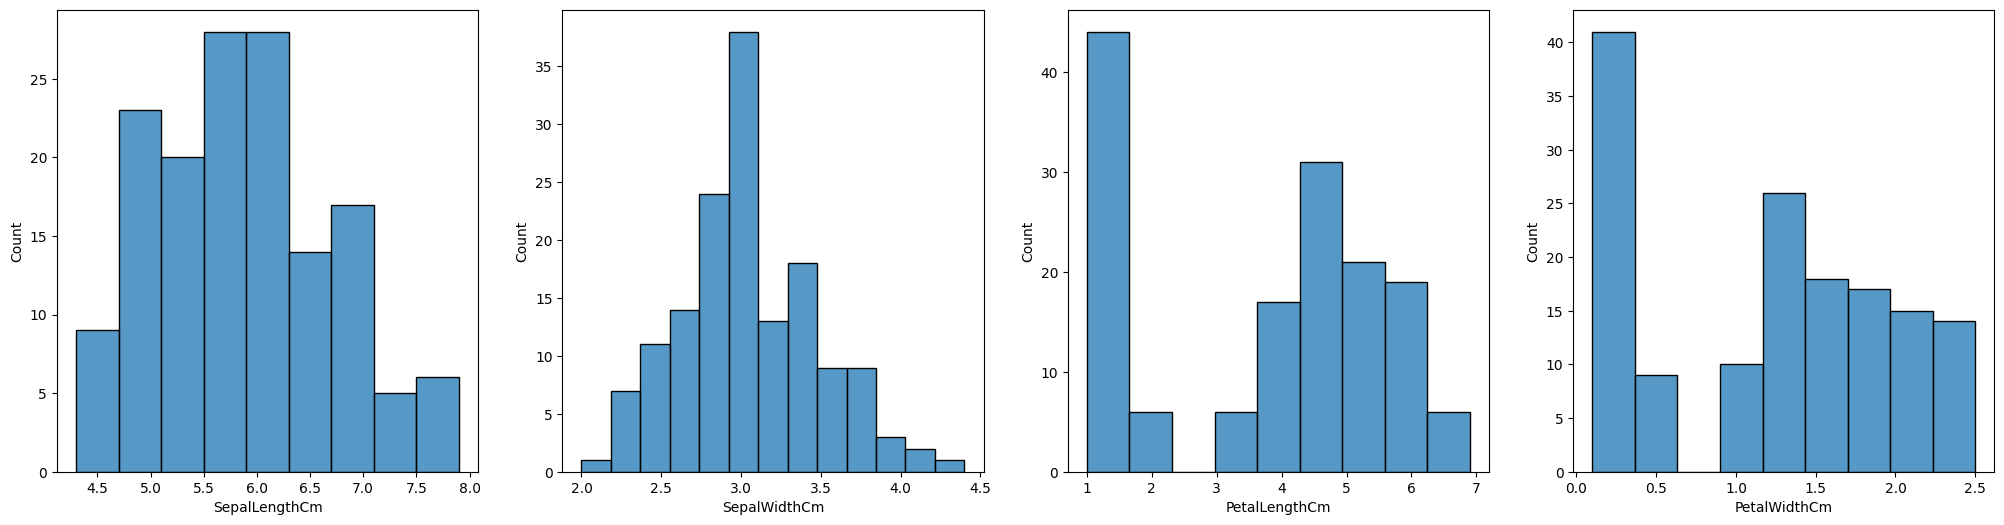

In [ ]:
# **e. Construyamos los Histogramas para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data[cols[0]])
plt.subplot(142)
sns.histplot(data[cols[1]])
plt.subplot(143)
sns.histplot(data[cols[2]])
plt.subplot(144)
sns.histplot(data[cols[3]])
plt.show()

# **f. Ambas funciones nuevas admiten la línea de estimación de densidad del núcleo, pasando kde=True:**

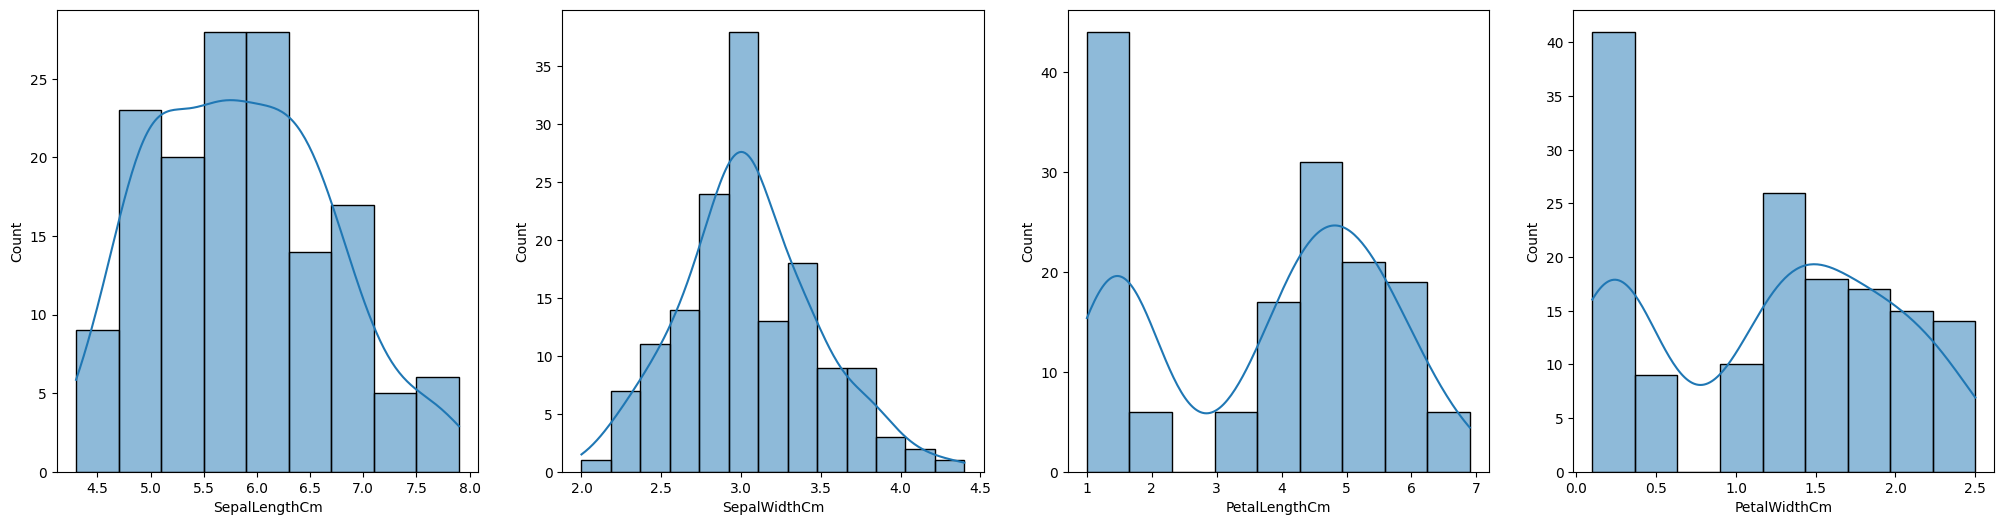

In [ ]:
# **d. Construyamos los Histogramas usando histplot  para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data[cols[0]], kde=True)
plt.subplot(142)
sns.histplot(data[cols[1]], kde=True)
plt.subplot(143)
sns.histplot(data[cols[2]], kde=True)
plt.subplot(144)
sns.histplot(data[cols[3]], kde=True)
plt.show()

# **g. Para replicar distplot más de cerca, podemos establecer stat="density"**

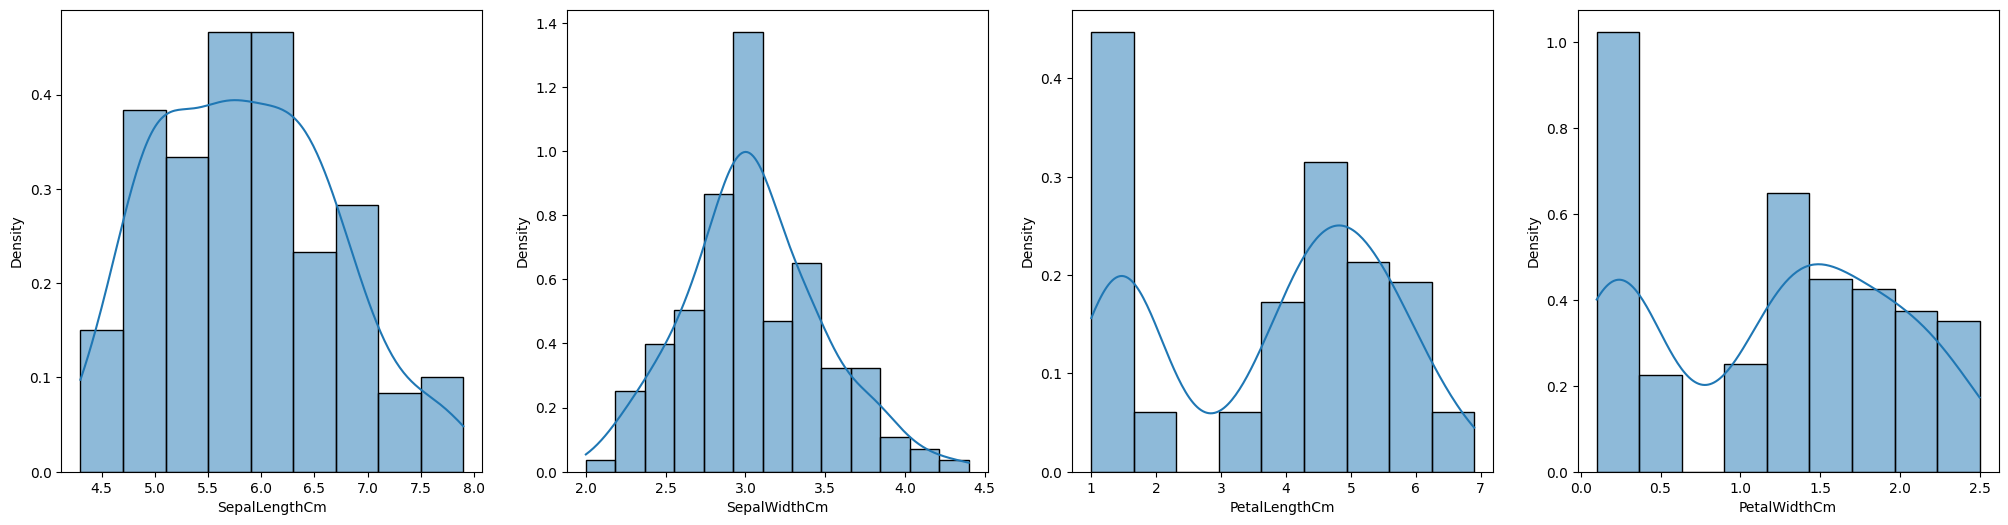

In [ ]:
# **g. Construyamos los Histogramas para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data[cols[0]], kde=True, stat="density")
plt.subplot(142)
sns.histplot(data[cols[1]], kde=True, stat="density")
plt.subplot(143)
sns.histplot(data[cols[2]], kde=True, stat="density")
plt.subplot(144)
sns.histplot(data[cols[3]], kde=True, stat="density")
plt.show()

# **h. Observe cómo la curva de KDE se extiende más allá del histograma en distplot**
+ pero solo cubre el rango real de los datos en histplot. Este comportamiento se puede controlar con el parámetro cut, que deberá pasar mediante kde_kws. El valor predeterminado de histplot es 0, mientras que el valor predeterminado de distplot es 3 (las unidades son múltiplos del ancho de banda del núcleo):

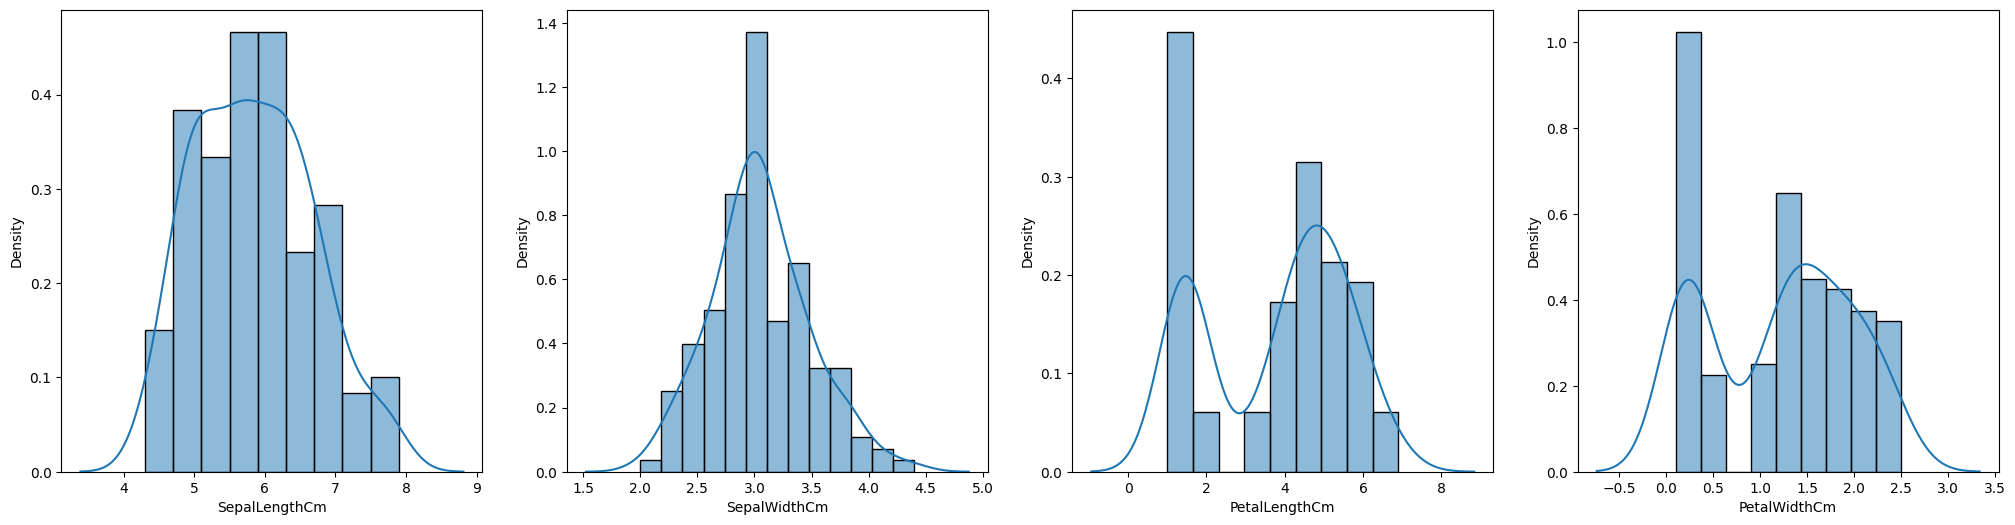

In [ ]:
# **h. Construyamos los Histogramas para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data[cols[0]], kde=True, stat="density", kde_kws=dict(cut=3))
plt.subplot(142)
sns.histplot(data[cols[1]], kde=True, stat="density", kde_kws=dict(cut=3))
plt.subplot(143)
sns.histplot(data[cols[2]], kde=True, stat="density", kde_kws=dict(cut=3))
plt.subplot(144)
sns.histplot(data[cols[3]], kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

# **i. La única otra pieza que falta es que la opacidad predeterminada del histograma distplot es un poco más baja**

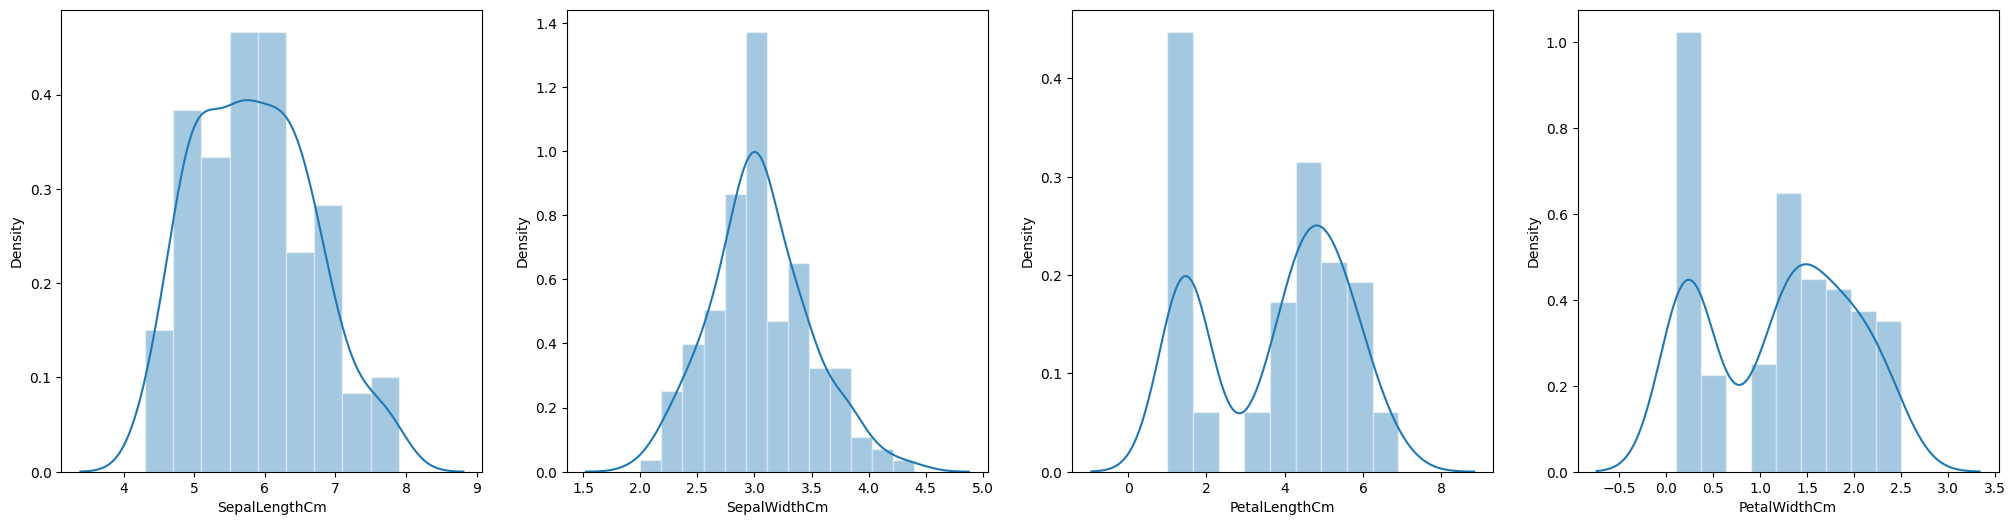

In [ ]:
# **i. Construyamos los Histogramas para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data[cols[0]], kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.subplot(142)
sns.histplot(data[cols[1]], kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.subplot(143)
sns.histplot(data[cols[2]], kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.subplot(144)
sns.histplot(data[cols[3]], kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

# **133. Gráficas de densidad**
+ **Mostrando una curva de densidad**. Si bien histplot (y displot) pueden superponer una curva de densidad kernel sobre el histograma, distplot también puede mostrar solo la curva de densidad si el histograma está deshabilitado:
+ El siguiente tipo de gráfico es un gráfico de estimación de densidad kernel (KDE). 
+ En caso de que no esté familiarizado con los gráficos de KDE, puede considerarlo como un histograma suavizado.
+ Para hacer un gráfico de KDE, usamos el comando sns.kdeplot. Establecer shade=True colorea el área debajo de la curva (y data= tiene la misma funcionalidad que cuando hicimos el histograma de arriba).

# **a. displot para cada Especie de Flor**

<ipython-input-23-e1640d3f222d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[cols[0]], hist=False)
<ipython-input-23-e1640d3f222d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[cols[1]], hist=False)
<ipython-input-23-e1640d3f222d>:10: UserWarning: 

`distpl

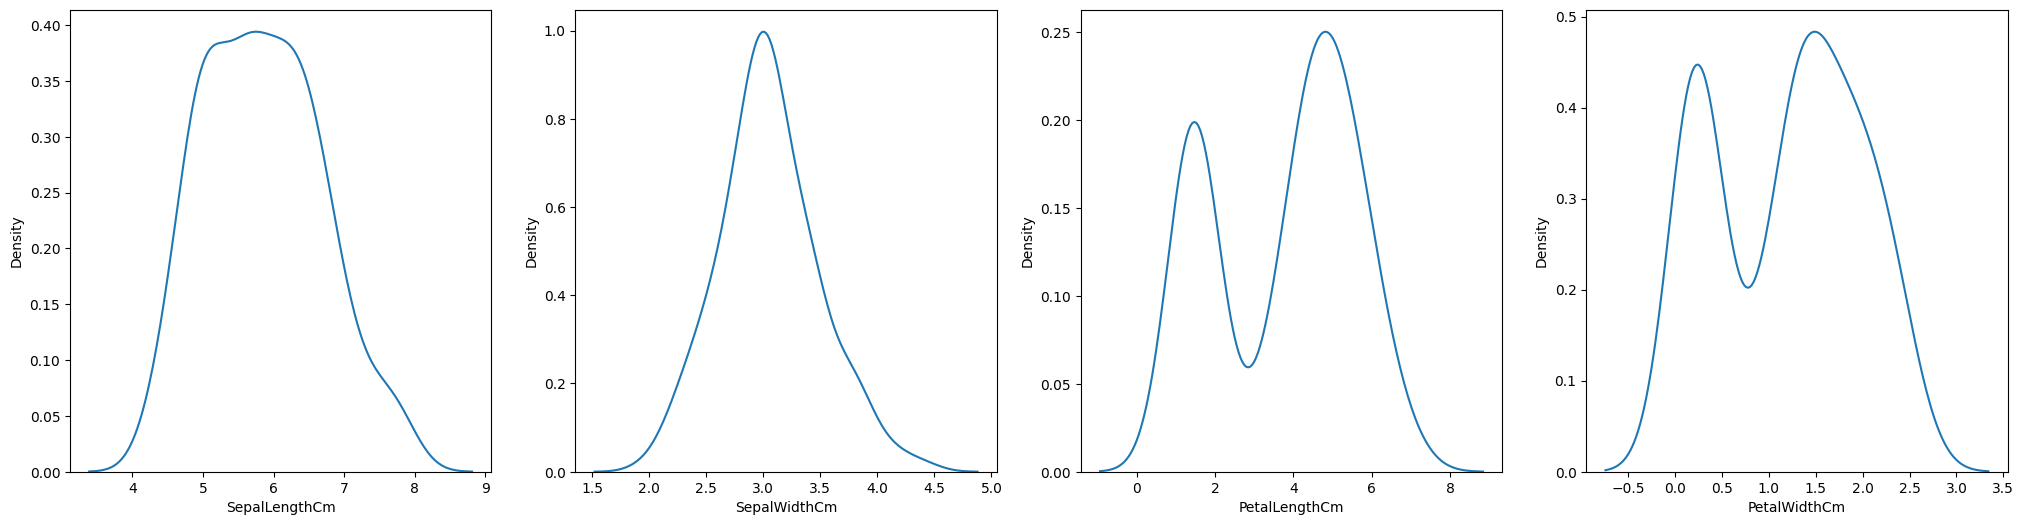

In [ ]:
# **a. displot para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.distplot(a=data[cols[0]], hist=False)
plt.subplot(142)
sns.distplot(a=data[cols[1]], hist=False)
plt.subplot(143)
sns.distplot(a=data[cols[2]], hist=False)
plt.subplot(144)
sns.distplot(a=data[cols[3]], hist=False)
plt.show()

# **b. kdeplot para cada Especie de Flor**

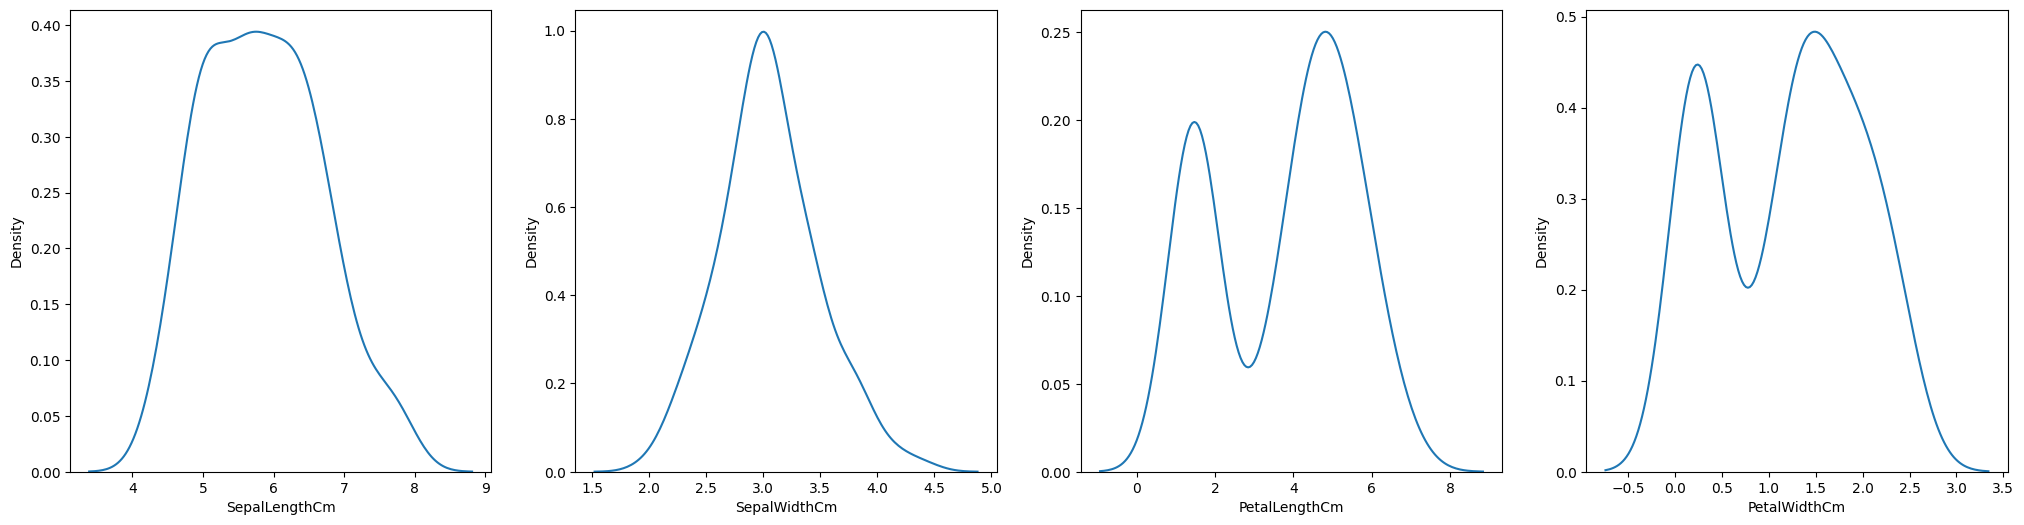

In [ ]:
# **b. kdeplot para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=data[cols[0]], shade=False)
plt.subplot(142)
sns.kdeplot(data=data[cols[1]], shade=False)
plt.subplot(143)
sns.kdeplot(data=data[cols[2]], shade=False)
plt.subplot(144)
sns.kdeplot(data=data[cols[3]], shade=False)
plt.show()

# **c. kdeplot con área para cada Especie de Flor**

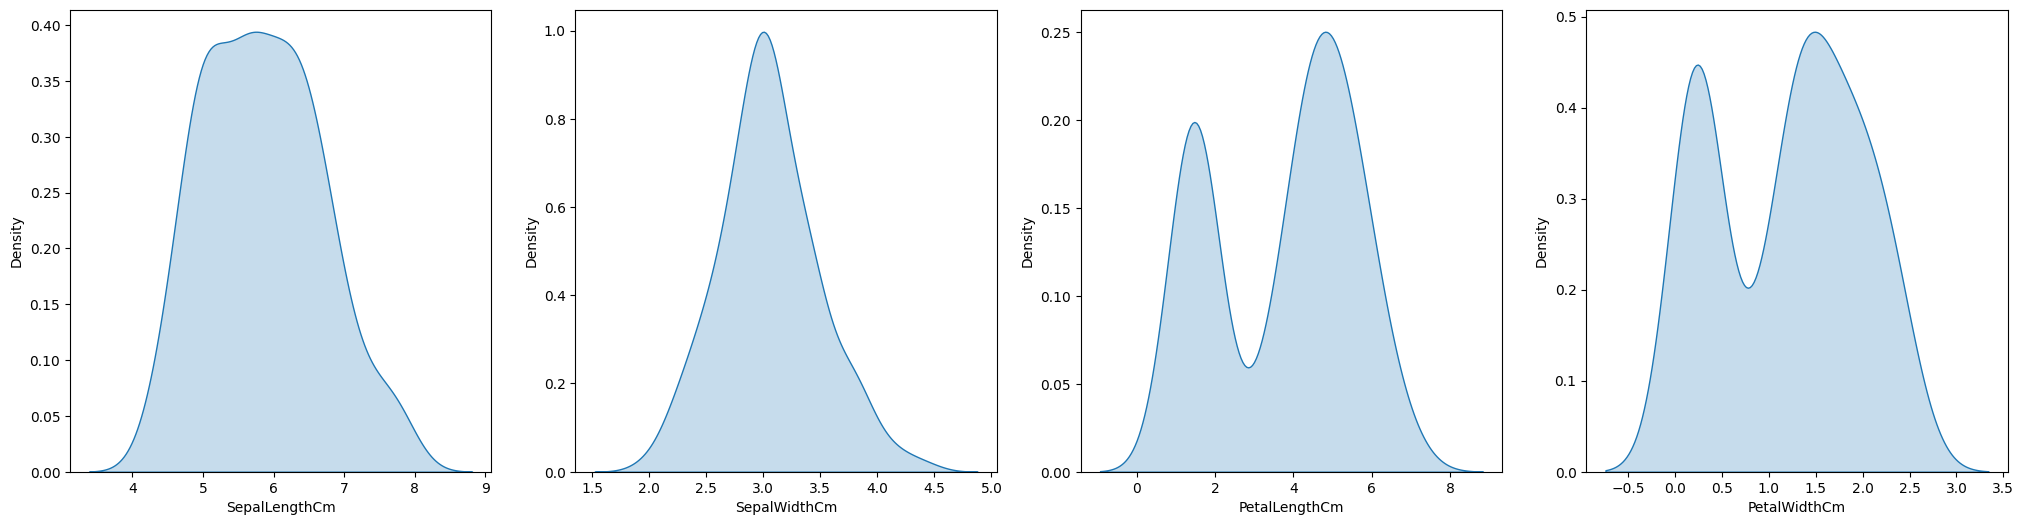

In [ ]:
# **c. kdeplot con área para cada Especie de Flor**
cols=data.columns[1:-1]
N=len(cols)
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=data[cols[0]], shade=True)
plt.subplot(142)
sns.kdeplot(data=data[cols[1]], shade=True)
plt.subplot(143)
sns.kdeplot(data=data[cols[2]], shade=True)
plt.subplot(144)
sns.kdeplot(data=data[cols[3]], shade=True)
plt.show()

# **d. Gráficos KDE 2D**
+ No estamos restringidos a una sola columna al crear un diagrama de KDE. 
+ Podemos crear un gráfico KDE bidimensional (2D) con el comando sns.jointplot. + En el diagrama a continuación, el código de colores nos muestra qué tan probable es que veamos diferentes combinaciones de ancho de sépalo y largo de pétalo, donde las partes más oscuras de la figura son más probables.

In [31]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

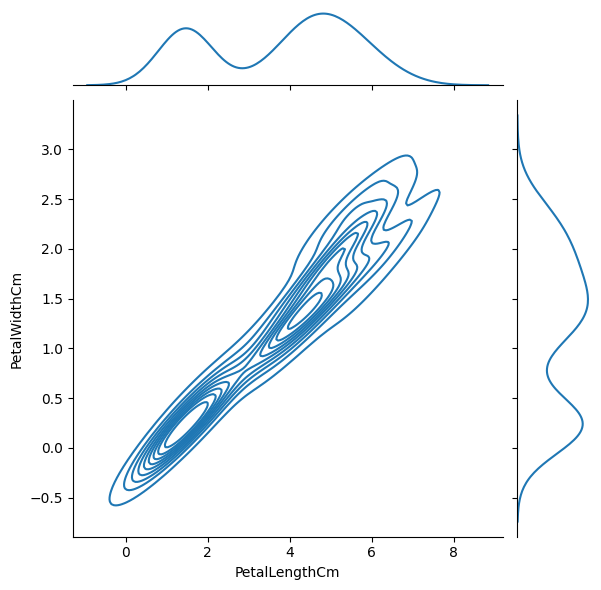

In [ ]:
# **d. Gráficos KDE 2D**
plt.figure(figsize=(8,6))
sns.jointplot(x=data['PetalLengthCm'], y=data['PetalWidthCm'], kind="kde")
plt.show()

# **134.. Gráficos codificados por colores**
- Para la siguiente parte del tutorial, crearemos diagramas para comprender las diferencias entre las especies.
+ Para lograr esto, comenzamos dividiendo el conjunto de datos en tres archivos separados, uno para cada especie.

# **a. Recordemos nuestra base de datos**

In [32]:
# **a. Recordemos nuestra base de datos**
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **b. Un pequeño reconteo**

In [34]:
# **b. Un pequeño reconteo**
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **c. Renombrando algunas Categorias, eliminando una columna**

In [39]:
# **c. Renombrando algunas Categorias, eliminando una columna**
data["Species"]=data["Species"].str.replace("Iris-setosa","setosa")
data["Species"]=data["Species"].str.replace("Iris-versicolor","versicolor")
data["Species"]=data["Species"].str.replace("Iris-virginica","virginica")
data.drop(['Id'], axis = 1)
data2 =data.drop(['Id'], axis = 1)
data2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# **d. Los Histogramas por separado de cada Especie - usando _displot_**

<ipython-input-41-a4fe92262c22>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data2[data2["Species"]=="setosa"]['PetalLengthCm'], label="Setosa", kde=True)
<ipython-input-41-a4fe92262c22>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data2[data2["Species"]=="versicolor"]['PetalLengthCm

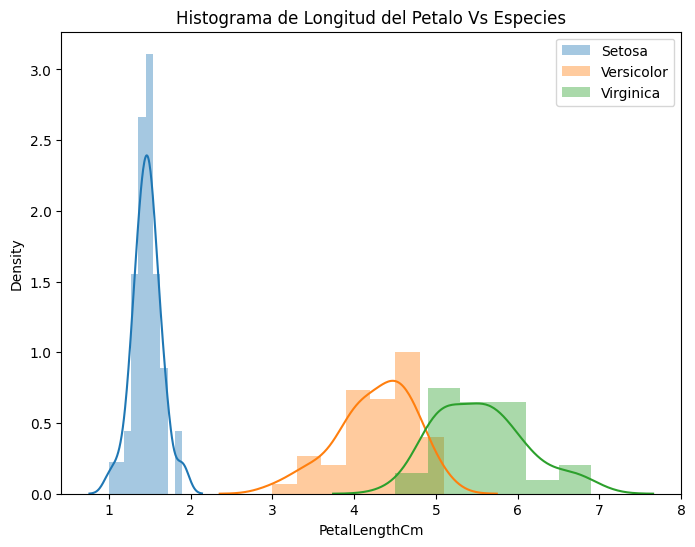

In [41]:
# **d. Los Histogramas por separado de cada Especie - usando _displot_**
plt.figure(figsize=(8,6))
sns.distplot(a=data2[data2["Species"]=="setosa"]['PetalLengthCm'], label="Setosa", kde=True)
sns.distplot(a=data2[data2["Species"]=="versicolor"]['PetalLengthCm'], label="Versicolor", kde=True)
sns.distplot(a=data2[data2["Species"]=="virginica"]['PetalLengthCm'], label="Virginica", kde=True)
# Titulo en la parte superior
plt.title("Histograma de Longitud del Petalo Vs Especies")

# La Leyenda para las especies
plt.legend()

# **e. Los Histogramas por separado de cada Especie - usando _histplot_**

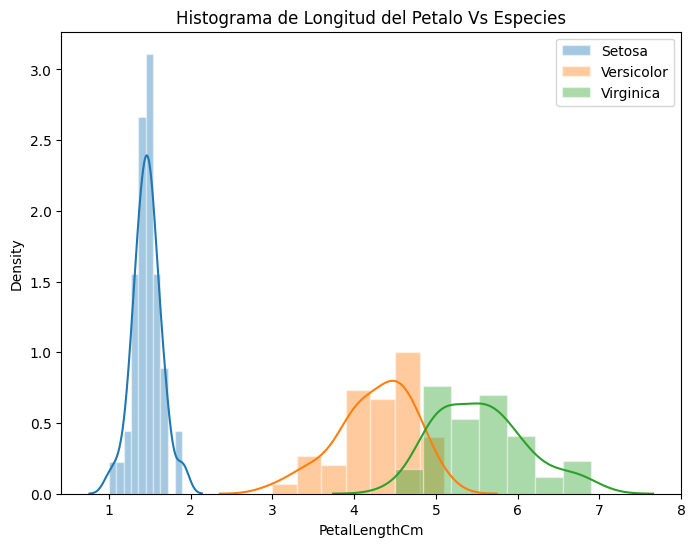

In [45]:
# **e. Los Histogramas por separado de cada Especie - usando _histplot_**
plt.figure(figsize=(8,6))
cols=data.columns[1:-1]
N=len(cols)

sns.histplot(data2[data2["Species"]=="setosa"]['PetalLengthCm'], label="Setosa", kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

sns.histplot(data2[data2["Species"]=="versicolor"]['PetalLengthCm'], label="Versicolor", kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

sns.histplot(data2[data2["Species"]=="virginica"]['PetalLengthCm'], label="Virginica", kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
# Titulo en la parte superior
plt.title("Histograma de Longitud del Petalo Vs Especies")

# La Leyenda para las especies
plt.legend()
plt.show()

# **135. ¿Cuál es la mejor Distribución que se ajusta a los datos? - Libreria _fitter_**
+ https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

# **a. Aplicación necesaria**

In [49]:
# **a. Aplicación necesaria**
# pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

# **b. Recordamos nuestros datos**

In [48]:
# **b. Recordamos nuestros datos**
data2.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# **c. Escogemos una de nuestras variables**

In [51]:
# **c. Escogemos una de nuestras variables**
Lon_pet = data2['PetalLengthCm'].values
Lon_pet

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

# **d. Distribuciones de ajuste para _Lon_pet_**
+ El siguiente paso es comenzar a ajustar diferentes distribuciones y encontrar la distribución más adecuada para los datos.

+ Los pasos son:

+ + Cree una instancia de Fitter llamando a Fitter()
+ + Proporcione los datos (Lon_pet) y la lista de distribuciones si tiene una idea básica de las distribuciones que podrían ajustarse a sus datos
+ + Aplicar el método .fit( )
+ + Genere el resumen de distribución ajustado usando el método .summary()

## **Nota:**

+ La clase Fitter en el backend usa la biblioteca Scipy que admite 80 distribuciones y la clase Fitter las escaneará todas, llamará a la función de ajuste por usted, ignorará aquellas que fallan o se ejecutan para siempre y finalmente le brinda un resumen de las mejores distribuciones en el sentido de la suma de los cuadrados de los errores.

+ Pero esto puede llevar algo de tiempo, ya que probará muchas distribuciones y el tiempo de ajuste también varía según el tamaño de la muestra. Por lo tanto, se recomienda trazar primero un histograma y obtener una idea general sobre los tipos de distribuciones que podrían ajustarse a los datos y proporcionar esos nombres de distribución en una lista utilizando el argumento de distribuciones . Esto definitivamente le ahorrará tiempo.

+ Aquí, he ajustado las distribuciones **gamma**, **lognormal**, **beta**, **burr** y **normal**. 
+ Llamar al método summary( ) en el objeto ajustado muestra las diferentes distribuciones y estadísticas de ajuste, como:
+ + sumsquare_error, 
+ + el criterio de información de Akaike ( aic ) 
+ + y los valores del criterio de información bayesiano ( bic ). 
+ De forma predeterminada, la función de resumen clasifica las cinco mejores distribuciones según los valores de sumsquare_error en orden ascendente. Además, proporciona una ilustración de diferentes distribuciones ajustadas sobre un histograma.

## **La distribución Burr**
+ (a veces llamada distribución Burr Tipo XII o distribución Singh-Maddala) es una familia unimodal de distribuciones con una amplia variedad de formas. 
+ Esta distribución se utiliza para modelar una amplia variedad de fenómenos, incluidos los precios de los cultivos, los ingresos familiares, las distribuciones de precios del mercado de opciones, el riesgo (seguro) y el tiempo de viaje. 
+ Es particularmente útil para modelar histogramas . Aunque existen otras formas (el tipo III también es muy común), el término “distribución de rebabas” suele referirse al tipo XII.
+ La distribución de rebabas Tipo XII se define por los siguientes parámetros:
+ + c y k: parámetros de forma . Para Burr Tipo XII, ambos son positivos. El tipo III tiene un parámetro c negativo.
+ + $\alpha$: parámetro de escala .
+ + $\gamma$: parámetro de ubicación continua .
+ Cuando el cuarto parámetro, $\gamma$, es igual a cero, da una distribución de tres parámetros ($c$,$k$,$\alpha$).


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.81it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,8.139717,385.881487,-417.039441,inf,0.206248,0.000004
norm,8.812442,395.662178,-415.149330,inf,0.199135,0.000011
lognorm,8.819607,397.671342,-410.016795,inf,0.199417,0.000011
gamma,8.841902,397.919367,-409.638085,inf,0.197749,0.000013
beta,9.390209,412.378498,-395.602619,inf,0.210442,0.000003


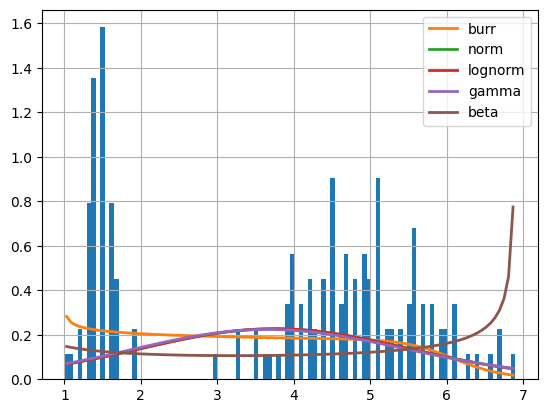

In [52]:
# **d. Distribuciones de ajuste para _Lon_pet_**
f = Fitter(Lon_pet,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

# **e. Identificando la mejor distribución**

In [54]:
# **e. Identificando la mejor distribución**
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 15.358177410806501,
  'd': 0.05917056185604802,
  'loc': 0.9999999999873196,
  'scale': 5.154607417810423}}

# **f. Con todas las Distribuciones de ajuste para _Lon_pet_**

Fitting 103 distributions: 100%|██████████| 103/103 [00:25<00:00,  4.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,7.077864,496.955892,-443.017569,inf,0.180724,0.000093
johnsonsb,8.051917,367.495564,-418.666226,inf,0.179221,0.000110
exponweib,8.114060,391.779401,-417.513001,inf,0.194118,0.000020
kappa3,8.123646,376.371695,-422.346534,inf,0.188675,0.000038
mielke,8.132450,383.458694,-417.173427,inf,0.209041,0.000003


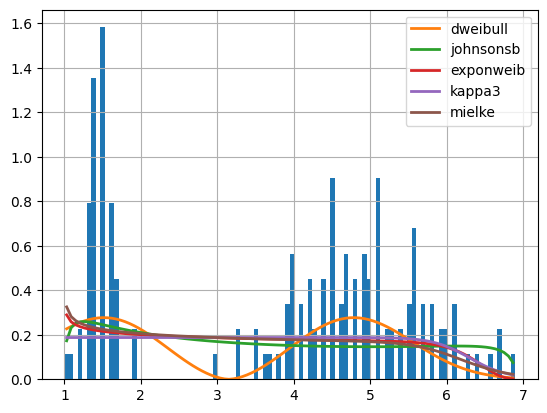

In [55]:
# **f. Con todas las Distribuciones de ajuste para _Lon_pet_**
f = Fitter(Lon_pet,
           distributions=
['alfa', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 
 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', ' coseno', 
 'bola de cristal', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 
 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy' , 
 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 
 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic',
 'gennorm', ' genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 
 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 
 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy ', 'levy_l', 
 'levy_stable', 'loggamma', 'logística', 'loglaplace', 'lognorm', 'louniform', 
 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
'norma', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 
 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss ', 'recíproco', 'arroz', 
 'rv_continuo', 'rv_histograma', 'semicircular', 'skewnorm', 't', 'trapz', 
 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniforme', 'vonmises', 
 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
f.fit()
f.summary()

# **g. Identificando la mejor distribución**

In [56]:
# **g. Identificando la mejor distribución**
f.get_best(method = 'sumsquare_error')

{'dweibull': {'c': 2.700195528327056,
  'loc': 3.150657944141647,
  'scale': 1.9403748151866103}}

# **136. ¿Cuál es la mejor Distribución que se ajusta a los datos por secciones? - Libreria _fitter_**

# **a. Recordando uestra data**

In [73]:
# **a. Recordando uestra data**
data.columns,data2['Species'].T

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: Species, Length: 150, dtype: object)

# **b. Escogemos una de nuestras variables por cada Especie**

In [69]:
# **b. Escogemos una de nuestras variables por cada Especie**
Lon_pet = data2['PetalLengthCm'].values
Lon_pet_setosa=data2[data2["Species"]=="setosa"]["PetalLengthCm"].values
Lon_pet_versicolor=data2[data2["Species"]=="versicolor"]["PetalLengthCm"].values
Lon_pet_virginica=data2[data2["Species"]=="virginica"]["PetalLengthCm"].values

# **c. Nuestros datos a evaluar PetalLengthCm vs setosa**

In [70]:
# **c. Nuestros datos a evaluar PetalLengthCm vs setosa**
Lon_pet_setosa

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

# **d. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm"**

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.26it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,2086.662680,83.149489,202.213005,inf,0.140123,0.255174
lognorm,2092.027104,67.550130,198.429358,inf,0.154102,0.167401
beta,2092.044697,69.494878,202.341801,inf,0.153955,0.168179
gamma,2092.047542,67.610281,198.429846,inf,0.152975,0.173455
norm,2092.097470,64.888740,194.519017,inf,0.156995,0.152621


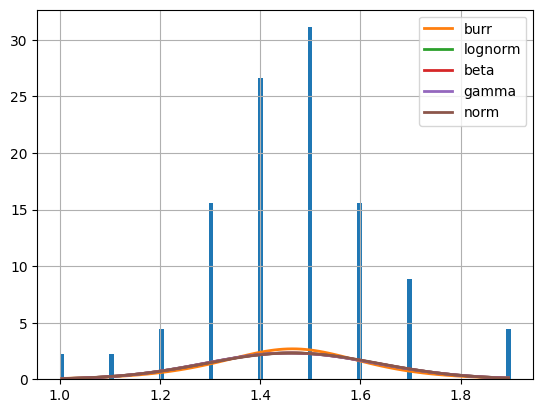

In [71]:
# **d. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm"**
f = Fitter(Lon_pet_setosa,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

# **e. Con todas las Distribuciones de ajuste para Lon_pet_setosa**

Fitting 103 distributions: 100%|██████████| 103/103 [00:42<00:00,  2.40it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,1731.819274,165.412101,188.981306,inf,0.314356,0.000069
dgamma,2057.590240,91.222788,197.599458,inf,0.177683,0.074899
loglaplace,2067.278143,89.579443,197.834324,inf,0.240000,0.005097
laplace,2067.464032,87.359433,193.926797,inf,0.240000,0.005097
dweibull,2068.932224,80.509519,197.874315,inf,0.158815,0.143873


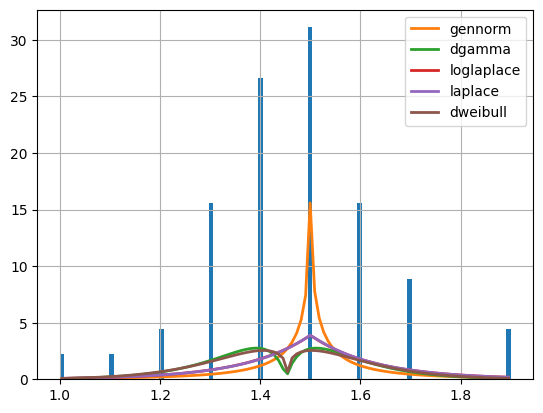

In [74]:
# **e. Con todas las Distribuciones de ajuste para Lon_pet_setosa**
f = Fitter(Lon_pet_setosa,
           distributions=
['alfa', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 
 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', ' coseno', 
 'bola de cristal', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 
 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy' , 
 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 
 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic',
 'gennorm', ' genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 
 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 
 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy ', 'levy_l', 
 'levy_stable', 'loggamma', 'logística', 'loglaplace', 'lognorm', 'louniform', 
 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
'norma', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 
 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss ', 'recíproco', 'arroz', 
 'rv_continuo', 'rv_histograma', 'semicircular', 'skewnorm', 't', 'trapz', 
 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniforme', 'vonmises', 
 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
f.fit()
f.summary()

# **f. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm" para Lon_pet_versicolor**

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,136.665085,210.176365,65.923607,inf,0.071772,0.942589
beta,136.995989,209.655832,66.044524,inf,0.077009,0.905978
norm,137.964844,224.911378,58.572841,inf,0.118275,0.451896
lognorm,137.996853,227.501313,62.496463,inf,0.119602,0.437913
gamma,138.314018,225.531926,62.611248,inf,0.126548,0.368822


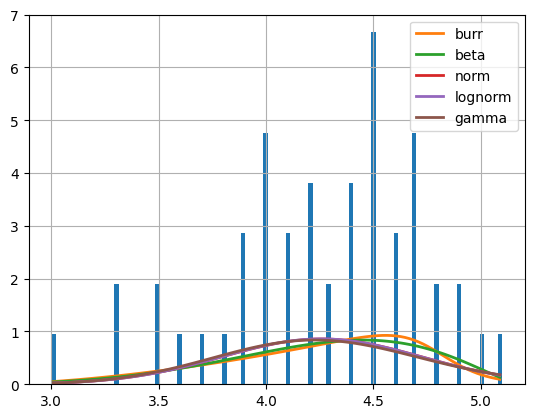

In [75]:
# **f. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm" para Lon_pet_versicolor**
f = Fitter(Lon_pet_versicolor,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()

# **g. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm" para Lon_pet_virginica**

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,97.386283,236.366308,45.069187,inf,0.106456,0.585313
beta,97.388260,229.264291,48.982225,inf,0.099175,0.672182
lognorm,97.444984,238.616148,45.099316,inf,0.109671,0.547705
burr,97.647991,247.934486,49.115396,inf,0.110850,0.534111
norm,98.114332,235.016048,41.529568,inf,0.115970,0.476731


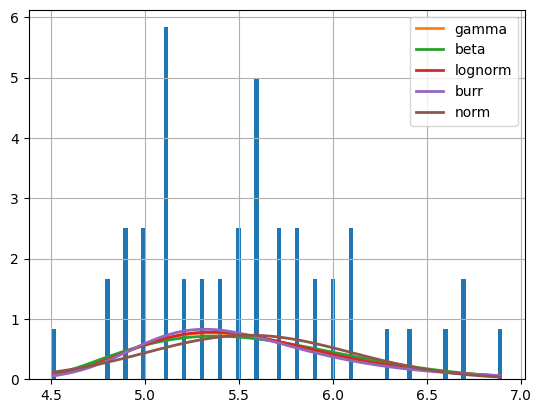

In [76]:
# **g. Explorando las distribuiones: 'gamma','lognorm',"beta","burr","norm" para Lon_pet_virginica**
f = Fitter(Lon_pet_virginica,distributions=['gamma','lognorm',"beta","burr","norm"])
f.fit()
f.summary()